In [ ]:
#Exercise 1 : Data Pre processing techniques

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,Normalizer
df = pd.read_csv('data.csv')
x = df.head()
print("Original data : \n",x)
print("\n")
#Mean Removal
print("Mean = \n",df.mean())
meanrem = df - df.mean()
df_meanrem = pd.DataFrame(meanrem,columns= df.columns)
print("Mean Removed : \n", df_meanrem)
print("\n")
#Scaling
scale = StandardScaler()
scaleval = scale.fit_transform(df)
df_scale = pd.DataFrame(scaleval,columns=df.columns)
print("Scaled Value : \n",df_scale)
print("\n")
#Normalization
norm = Normalizer()
normalval = norm.fit_transform(df)
df_norm = pd.DataFrame(normalval,columns=df.columns)
print("Normalized Value : \n",df_norm)



Original data : 
    feature1  feature2  feature3
0       1.0       2.0       3.0
1       5.0       6.0       7.0
2       9.0      10.0      11.0
3       2.0       3.0       4.0
4       6.0       7.0       8.0


Mean = 
 feature1    4.6
feature2    5.6
feature3    6.6
dtype: float64
Mean Removed : 
    feature1  feature2  feature3
0      -3.6      -3.6      -3.6
1       0.4       0.4       0.4
2       4.4       4.4       4.4
3      -2.6      -2.6      -2.6
4       1.4       1.4       1.4


Scaled Value : 
    feature1  feature2  feature3
0 -1.254119 -1.254119 -1.254119
1  0.139347  0.139347  0.139347
2  1.532813  1.532813  1.532813
3 -0.905753 -0.905753 -0.905753
4  0.487713  0.487713  0.487713


Normalized Value : 
    feature1  feature2  feature3
0  0.267261  0.534522  0.801784
1  0.476731  0.572078  0.667424
2  0.517892  0.575435  0.632979
3  0.371391  0.557086  0.742781
4  0.491539  0.573462  0.655386


  Weather  Temp Play
0   Sunny   Hot   No
1  Cloudy   Hot  Yes
2   Rainy  Cool  Yes
3  Cloudy  Cool  Yes
4   Rainy   Hot   No


   Weather  Temp  Play
0        2     1     0
1        0     1     1
2        1     0     1
3        0     0     1
4        1     1     0


[0 0]
 Accuracy : 0.5
Confusion Matrix : 
 [[1 0]
 [1 0]]




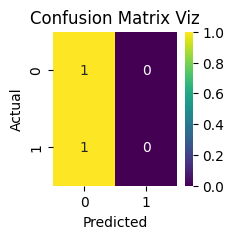

In [ ]:
# Exercise 2 : To. implement classification Techniques

## Naive Bayes Classifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

df = pd.DataFrame({
    "Weather":["Sunny","Cloudy","Rainy","Cloudy","Rainy"],
    "Temp":["Hot","Hot","Cool","Cool","Hot"],
    "Play" :["No","Yes","Yes","Yes","No"]
})
print(df)
print("\n")
df_col = df.columns
for i in df_col:
  l = LabelEncoder()
  df[i] = l.fit_transform(df[i])
print(df)
print("\n")

x = df.iloc[:,:2]
y = df.iloc[:,2]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
naive = GaussianNB()
naive.fit(x_train,y_train)
y_pred = naive.predict(x_test)
print (y_pred)
acc = accuracy_score(y_test,y_pred)
print(f" Accuracy : {acc}")
cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix : \n {cm}")
print("\n")

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (2,2))
target = df['Play']
sns.heatmap(cm,annot = True,cmap = "viridis",fmt = "d")
plt.title("Confusion Matrix Viz")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy : 0.93


Confusion Matrix : 
 [[61  6]
 [ 1 32]]




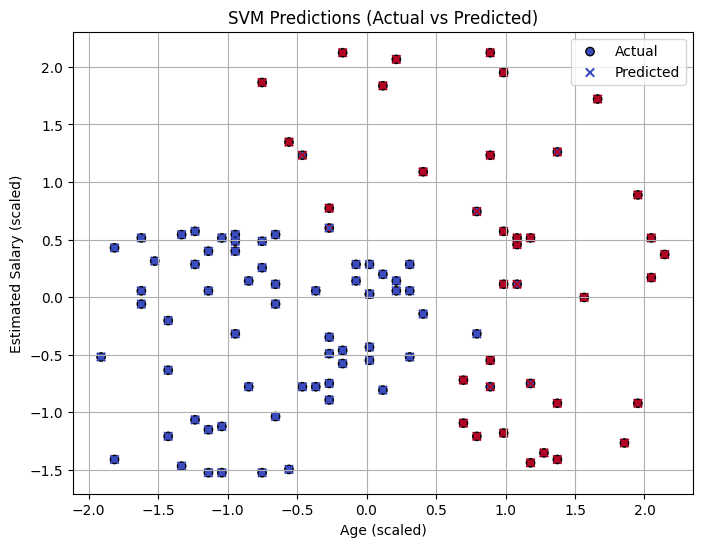

In [ ]:
## Support Vector Machine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("Social_Network_Ads.csv")
data.head(2)

x = data.iloc[:,2:4]
y = data.iloc[:,4]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

svm = SVC(kernel = "rbf")
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy : {acc}")
print("\n")
cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix : \n {cm}")
print("\n")

# Plot the predicted vs actual in a scatter plot
plt.figure(figsize=(8, 6))

# Plot actual classes
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='coolwarm', marker='o', label='Actual', edgecolor='k')

# Plot predicted classes with a different marker
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predicted')

plt.title('SVM Predictions (Actual vs Predicted)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.grid(True)
plt.show()



Accuracy : 0.83


Confusion Matrix : 
 [[58  5]
 [12 25]]




<ipython-input-127-037114b32552>:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[:,0],x_test[:,1],c = y_test,cmap = "coolwarm",marker = "x",label = "Actual",edgecolor ="k")


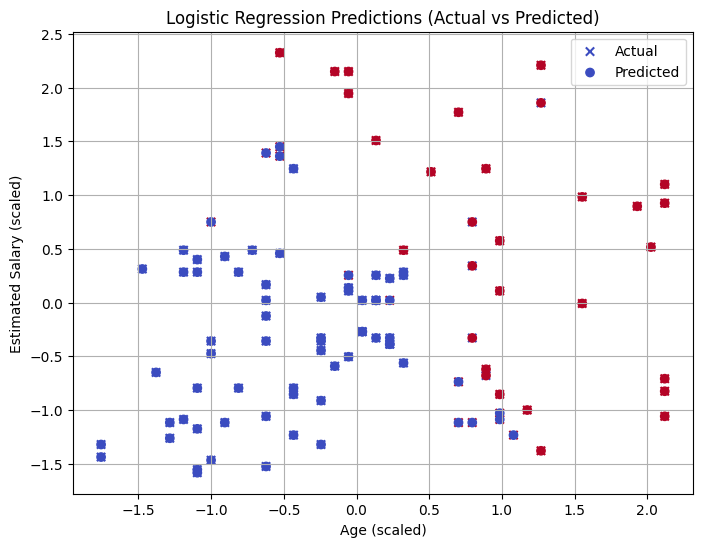

In [ ]:
## Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("Social_Network_Ads.csv")
data.head(2)
x = data.iloc[:,2:4]
y = data.iloc[:,4]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy : {acc}")
print("\n")
cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix : \n {cm}")
print("\n")

plt.figure(figsize = (8,6))
plt.scatter(x_test[:,0],x_test[:,1],c = y_test,cmap = "coolwarm",marker = "x",label = "Actual",edgecolor ="k")
plt.scatter(x_test[:,0],x_test[:,1],c = y_pred,cmap = "coolwarm",marker = "o",label ="Predicted")
plt.title("Logistic Regression Predictions (Actual vs Predicted)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



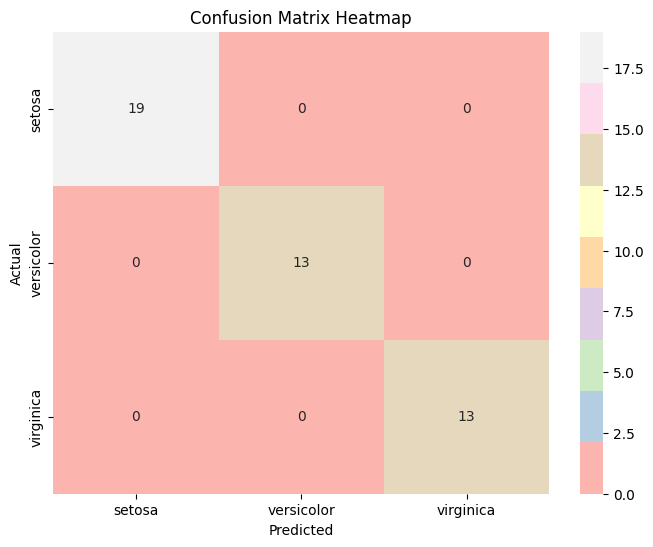

In [ ]:
## Decision Tree

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
## Random Forest


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


Silhoutte Score : 
 0.5511916046195927

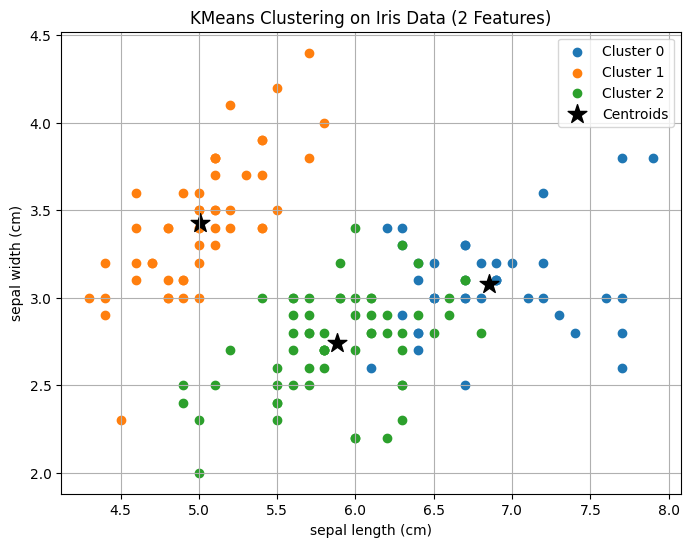

In [ ]:
# Exercise 3 : To implement KMeans Clustering

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
print(iris_df)
print("\n")
iris_df.to_csv("iris.csv",index = False)

df = pd.read_csv("iris.csv")
x = df.iloc[:,:4]
kmodel = KMeans(n_clusters = 3,random_state = 42)
df['cluster'] = kmodel.fit_predict(x)
# S = Measures how similar a point is to its own cluster compared to other clusters.📊 Range: -1 to 1 (higher is better).
score = silhouette_score(x,df['cluster'])
print("Silhoutte Score : \n",score)
print("\n")
#DB = Measures intra-cluster similarity vs. inter-cluster differences.📉 Lower is better (0 is ideal).
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(x,df['cluster'])
print("Davies Bouldin Score : \n",score)
print("\n")
##plotting
plt.figure(figsize =(8,6))
for cluster_id in range(3):
  plt.scatter(x[df['cluster'] == cluster_id].iloc[:, 0],
                x[df['cluster'] == cluster_id].iloc[:, 1],
                label=f'Cluster {cluster_id}')
centers = kmodel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='*', s=200, label='Centroids')
plt.title("KMeans Clustering on Iris Data (2 Features)")
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Exercise  4 : To implement  tokenization , Stemming and lemmatization

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download("punkt_tab")
nltk.download("wordnet")
nltk.download("stopwords")
text = "The quick brown fox jumps over the lazy dog. The dog barks loudly."
print("\n")
print("Original Text : \n",text)
print("\n")
tokens = word_tokenize(text)
print("Tokens: \n",tokens)
print("\n")
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]
print("Filtered Tokens : \n",filtered_tokens)
print("\n")
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
print("Stemmed Tokens : \n",stemmed_tokens)
print("\n")
lemma = WordNetLemmatizer()
lemmatized_words = [lemma.lemmatize(word) for word in filtered_tokens]
print("Lemmatized Tokens: \n",lemmatized_words)
print("\n")




Original Text : 
 The quick brown fox jumps over the lazy dog. The dog barks loudly.


Tokens: 
 ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', 'The', 'dog', 'barks', 'loudly', '.']


Filtered Tokens : 
 ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'dog', 'barks', 'loudly']


Stemmed Tokens : 
 ['quick', 'brown', 'fox', 'jump', 'lazi', 'dog', 'dog', 'bark', 'loudli']


Lemmatized Tokens: 
 ['quick', 'brown', 'fox', 'jump', 'lazy', 'dog', 'dog', 'bark', 'loudly']




[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Exercise  5 : To Implement Bag of Words model

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download("punkt_tab")
nltk.download("stopwords")
def preprocess_text(text):
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words("english"))
  filtered_tokens = [ word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
  return filtered_tokens
def create_BoW(texts):
  all_words =[]
  for text in texts :
    word = preprocess_text(text)
    all_words.extend(word)
  word_freq = FreqDist(all_words)
  bow_model = { word :freq for word,freq in word_freq.items()}
  return bow_model
texts =[
    "The cat sat on the mat, and the mat was comfortable",
    "She sang a sweet song, a song that touched everyone's heart",
    "Coding coding can be challenging but coding is also incredibly rewarding ",
]
bow = create_BoW(texts)
for word,freq in bow.items():
  print(f"{word} : {freq}")



cat : 1
sat : 1
mat : 2
comfortable : 1
sang : 1
sweet : 1
song : 2
touched : 1
everyone : 1
heart : 1
coding : 3
challenging : 1
also : 1
incredibly : 1
rewarding : 1


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Exercise  6 : To implement Modelling

import csv
import re

def identify_patterns(csv_file,column_name):
  pattern = { }
  with open(csv_file,mode = 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      text = row[column_name]
      pattern_match = re.findall(r"Female",text,flags = re.IGNORECASE)
      for match in pattern_match:
        match = match.title()
        if match in pattern :
          pattern[match] += 1
        else :
          pattern[match] = 1
  return pattern
csv_file = "social.csv"
column_name = "Gender"
result = identify_patterns(csv_file,column_name)
print(result)
print("\n")
for pattern,count in result.items():
  print(f"Pattern :{pattern},Count : {count}")

{'Female': 4}


Pattern :Female,Count : 4


In [ ]:
# Exercise  7 : To implement Hidden Markov Model


import numpy as np
from hmmlearn import hmm

# Number of states in the model (Rainy, Sunny)
n_states = 2

# Transition matrix (rows should sum to 1)
trans_matrix = np.array([[0.7, 0.3], [0.4, 0.6]])

# Emission matrix (probabilities for each observation from each state)
emission_matrix = np.array([[0.1, 0.4, 0.5], [0.6, 0.3, 0.1]])

# Initial state probabilities
init_prob = np.array([0.6, 0.4])

# Create the Multinomial HMM model
model = hmm.MultinomialHMM(n_components=n_states, n_iter=100)
model.startprob_ = init_prob
model.transmat_ = trans_matrix
model.emissionprob_ = emission_matrix  # Set the emission matrix

# Training data (observations: 0 = Umbrella, 1 = Jacket, 2 = T-shirt)
train_data = np.array([[0, 1, 2, 0, 1, 2, 0, 2, 1]]).reshape(-1, 1)

# Fit the model to the training data
model.fit(train_data)

# Test data (observations: 2 = T-shirt, 0 = Umbrella, 1 = Jacket)
test_data = np.array([[1,2,2,0,0,1]]).reshape(-1, 1)

# Predict the states for the test data
prediction = model.predict(test_data)

# Map predicted states to weather states
weather_state = ['Rainy', 'Sunny']
pred_state = [weather_state[state] for state in prediction]

# Output the predicted weather states
print("\n")
print("Predicted Weather States: ", pred_state)


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340




Predicted Weather States:  ['Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy']


In [ ]:
# Exercise  8 : Implementation of Single Layer and Multi Layer Neural Network

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and preprocess the Iris dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proper scaling: Fit on training, transform both
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and compile a single-layer neural network
model_single_layer = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dense(3, activation='softmax')
])
model_single_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
model_single_layer.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))
y_pred = model_single_layer.predict(X_test)
# Evaluate the single-layer model
single_layer_accuracy = accuracy_score(y_test,
    np.argmax(y_pred,axis = 1))
print(f"\nSingle-layer Neural Network - Accuracy: {single_layer_accuracy:.2f}")

# Define and compile a multi-layer neural network
model_multi_layer = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model_multi_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
model_multi_layer.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))
y_pred = model_multi_layer.predict(X_test)
# Evaluate the multi-layer model
multi_layer_accuracy = accuracy_score(y_test,
    np.argmax(y_pred, axis=1))
print(f"\nMulti-layer Neural Network - Accuracy: {multi_layer_accuracy:.2f}")


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.4069 - loss: 1.1186 - val_accuracy: 0.2667 - val_loss: 1.0852
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3627 - loss: 1.0535 - val_accuracy: 0.4000 - val_loss: 1.0146
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5152 - loss: 1.0087 - val_accuracy: 0.6000 - val_loss: 0.9493
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6573 - loss: 0.9464 - val_accuracy: 0.7000 - val_loss: 0.8894
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6637 - loss: 0.8818 - val_accuracy: 0.7667 - val_loss: 0.8360
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7635 - loss: 0.8279 - val_accuracy: 0.8333 - val_loss: 0.7853
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7885 - loss: 0.7800 - val_accuracy: 0.8333 - val_loss: 0.7391
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7750 - loss: 0.7531 - val_accuracy: 0.8333 - val_loss: 0.6970
Epoch 9/15

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.2919 - loss: 1.1784 - val_accuracy: 0.2667 - val_loss: 1.0948
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3781 - loss: 1.0779 - val_accuracy: 0.6667 - val_loss: 1.0156
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6033 - loss: 1.0055 - val_accuracy: 0.8000 - val_loss: 0.9451
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7406 - loss: 0.9353 - val_accuracy: 0.8000 - val_loss: 0.8776
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.7806 - loss: 0.8729 - val_accuracy: 0.8000 - val_loss: 0.8118
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7715 - loss: 0.8162 - val_accuracy: 0.8000 - val_loss: 0.7481
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7892 - loss: 0.7411 - val_accuracy: 0.8000 - val_loss: 0.6878
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7654 - loss: 0.7170 - val_accuracy: 0.8333 - val_loss: 0.6332
Epoch 9/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

Multi-layer Neural Network - Accuracy: 0.87


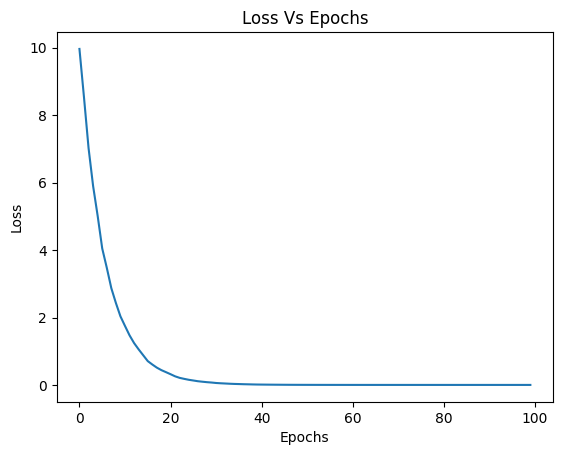

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
0.4 : [[1.8080635]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
0.6 : [[2.2078967]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
0.2 : [[1.4082303]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
0.8 : [[2.60773]]


In [ ]:
# Exercise  9 : To build a Linear Regression Model using ANN

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x_train = np.random.randn(100,1)
y_train = 2 * x_train + 1 + 0.1 * np.random.randn(1,100)
model = tf.keras.Sequential([tf.keras.layers.Dense(units = 1,input_shape = (1,))])
model.compile(optimizer = "sgd",loss = "mean_squared_error")
train = model.fit(x_train,y_train,epochs = 100,verbose = 0)
plt.plot(train.history['loss'])
plt.title("Loss Vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

x_test = np.array([[0.4],[0.6],[0.2],[0.8]])
for i in range(len(x_test)):
  print(f"{x_test[i][0]} : {model.predict(x_test[i].reshape(1,1))}")

In [ ]:
# Exercise 10 : To build an image classifier a Deep Learning Application

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

model = Sequential([
    Conv2D(32,kernel_size = (3,3),activation = "relu",input_shape = (28,28,1)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(32,kernel_size = (3,3), activation = "relu",input_shape = (28,28,1)),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(64,activation = "relu"),
    Dense(10,activation = "softmax")
])
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 3,validation_split = 0.1)
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f"Test Accuracy : {test_accuracy}")
print(f"Test Losss : {test_loss}")

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.8863 - loss: 0.3742 - val_accuracy: 0.9807 - val_loss: 0.0640
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9807 - loss: 0.0610 - val_accuracy: 0.9882 - val_loss: 0.0420
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9888 - loss: 0.0368 - val_accuracy: 0.9900 - val_loss: 0.0348
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9852 - loss: 0.0441
Test Accuracy : 0.9894000291824341
Test Losss : 0.03238289803266525
